### Student Details

Student Name: Lin Yuan Chong

Student ID: 22249516


# Task 2: scikit learn

In [3]:
# import dependencies
import numpy as np
from sklearn.model_selection import train_test_split

1.	Read the iris dataset using Pandas (ref Option 2 above)
2.	Extract the Iris-setosa and Iris-verginica samples only
3.	Extract the petal length and petal width. These shall be our features.

In [4]:
import pandas as pd
df = pd.read_csv('/content/iris_data.csv', header=0)

################################
# Your code here
# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

df.sample(10)

,sepal_length,sepa_width,petal_length,petal_width,class
74,6.4,2.9,4.3,1.3,Iris-versicolor
125,7.2,3.2,6.0,1.8,Iris-virginica
110,6.5,3.2,5.1,2.0,Iris-virginica
23,5.1,3.3,1.7,0.5,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
123,6.3,2.7,4.9,1.8,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica
129,7.2,3.0,5.8,1.6,Iris-virginica
38,4.4,3.0,1.3,0.2,Iris-setosa


In [5]:
#Extract the Iris-setosa and Iris-verginica samples only.
setDf = df.loc[df[" class"] == "Iris-setosa"]
verDf = df.loc[df[" class"] == "Iris-virginica"]

#Select row 2, 3, and 4 where "class" lebel = "Iris-setosa" or "Iris-virginica".
setVerDf = df.iloc[:, [2,3,4]][(df[" class"] == "Iris-setosa") | (df[" class"] == "Iris-virginica")]

# print("Number of Iris-setosa samples:\t\t", len(setDf))
# print("Number of Iris-virginica samples:\t", len(verDf))
# print("Total samples:\t\t\t\t", len(setVerDf))

setVerDf

,petal_length,petal_width,class
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa
...,...,...,...
145,5.2,2.3,Iris-virginica
146,5.0,1.9,Iris-virginica
147,5.2,2.0,Iris-virginica
148,5.4,2.3,Iris-virginica


4.	Plot the dataset as a scatter plot with the two Iris types shown as different colours

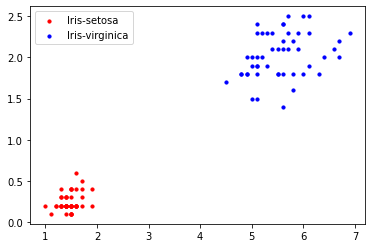

In [6]:
################################
# Your code here

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from matplotlib.pyplot import figure

#Convert data into array.
scatter_x = np.array(setVerDf[" petal_length"])
scatter_y = np.array(setVerDf[" petal_width"])
group = np.array(setVerDf[" class"])
cdict = {"Iris-setosa": 'red', "Iris-virginica": 'blue'}

fig, ax = plt.subplots()
for g in np.unique(group):
  ix = np.where(group == g)
  ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 10)
ax.legend()
plt.show()

5.	Use the perceptron in sklearn.linear_model to train on the Iris data previously used. Set verbose = 1; have a look at the epochs, it converges very quickly?

Convergence happened on the 7th epoch.

In [7]:
# So as not to confuse with our previously defined Perceptron class
from sklearn.linear_model import Perceptron as Perceptron 

################################
# Your code here

#Inputs: petal_length, petal_width.
X = setVerDf.iloc[:, :2]
#Output: class.
y = setVerDf.iloc[:, 2]

clf = Perceptron(verbose=1)
clf.fit(X, y)

-- Epoch 1
Norm: 1.52, NNZs: 2, Bias: -2.000000, T: 100, Avg. loss: 0.164200
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.52, NNZs: 2, Bias: -2.000000, T: 200, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.52, NNZs: 2, Bias: -2.000000, T: 300, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.52, NNZs: 2, Bias: -2.000000, T: 400, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 1.52, NNZs: 2, Bias: -2.000000, T: 500, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 1.52, NNZs: 2, Bias: -2.000000, T: 600, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 1.52, NNZs: 2, Bias: -2.000000, T: 700, Avg. loss: 0.000000
Total training time: 0.01 seconds.
Convergence after 7 epochs took 0.01 seconds


Perceptron(verbose=1)

6.	Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary for the feature scaled case

In [8]:
import random

################################
# Your code here

#Get data.
len = setVerDf[" petal_length"]
wid = setVerDf[" petal_width"]

#Get boundaries of data1.
lenMin = len.min()
lenMax = len.max()
#Get boundaries of data2.
widMin = wid.min()
widMax = wid.max()

print("Length range:\t", round(lenMin, 1), "~", round(lenMax, 1))
print("Width range:\t", round(widMin, 1), "~", round(widMax, 1))

#Functions to create a sample dataframe.
def CreateDataFrame(num):

  columns = [' petal_length', ' petal_width']
  df = pd.DataFrame(columns=columns)

  for i in range(num):
    #Within range.
    len = round(np.random.uniform(lenMin, lenMax), 1)
    wid = round(np.random.uniform(widMin, widMax), 1)
    #Assign.
    df.loc[i]= [len, wid]

  return df

Length range:	 1.0 ~ 6.9
Width range:	 0.1 ~ 2.5


In [9]:
#Create sample dataframe.
sampleDf = CreateDataFrame(5000)
sampleDf.sample(5)

,petal_length,petal_width
4901,3.2,1.4
4735,5.1,0.4
4585,4.7,0.8
3393,6.5,0.7
4201,4.5,1.3


In [10]:
sampleDf['Pred Class'] = clf.predict(sampleDf.iloc[:,:])

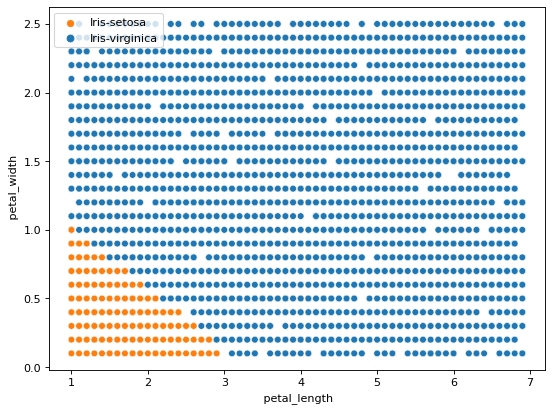

In [11]:
import seaborn as sns

figure(figsize=(8, 6), dpi=80)

#Obtain decision boundary.
sns.scatterplot(data=sampleDf, x=" petal_length", y=" petal_width", hue="Pred Class")
plt.legend(labels=["Iris-setosa", "Iris-virginica"])

#Manually set colors for legend.
#https://matplotlib.org/stable/gallery/color/named_colors.html
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('tab:orange')
leg.legendHandles[1].set_color('tab:blue')

plt.show()